In [1]:
import pandas as pd

In [2]:
xls = pd.ExcelFile('Netflix Revenue and Usage Statistics.xlsx')
revenue = pd.read_excel(xls, 'Netflix annual revenue 2011 to ')
net_income_loss = pd.read_excel(xls, 'Netflix annual net incomeloss (')
subscribers = pd.read_excel(xls, 'Netflix annual subscribers 2011')

service_pct = pd.read_excel(xls, 'US audience streaming minutes 2')

In [3]:
subscribers.columns

Index(['Date', 'Subscribers (mm)'], dtype='object')

In [4]:
data = pd.concat([revenue, net_income_loss['Net Income/Loss ($mm)'], subscribers['Subscribers (mm)']], axis = 1, join = 'outer')

In [5]:
data.dropna(inplace = True)

In [6]:
import seaborn as sns
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})

data.columns = ['year', 'revenue(b)', 'net(m)', 'subscribers(m)']
data['revenue(m)'] = data['revenue(b)'] * 1000
data['loss(m)'] = data['revenue(m)'] - data['net(m)']
data

,year,revenue(b),net(m),subscribers(m),revenue(m),loss(m)
0,2011.0,3.1,225.0,21.50,3100.0,2875.0
1,2012.0,3.5,17.0,25.71,3500.0,3483.0
2,2013.0,4.3,112.0,35.63,4300.0,4188.0
3,2014.0,5.4,266.0,47.99,5400.0,5134.0
4,2015.0,6.7,122.0,62.71,6700.0,6578.0
5,2016.0,8.8,188.0,79.90,8800.0,8612.0
6,2017.0,11.6,560.0,99.04,11600.0,11040.0
7,2018.0,15.7,1211.0,124.35,15700.0,14489.0
8,2019.0,20.1,1867.0,151.56,20100.0,18233.0
9,2020.0,24.9,2761.0,192.95,24900.0,22139.0


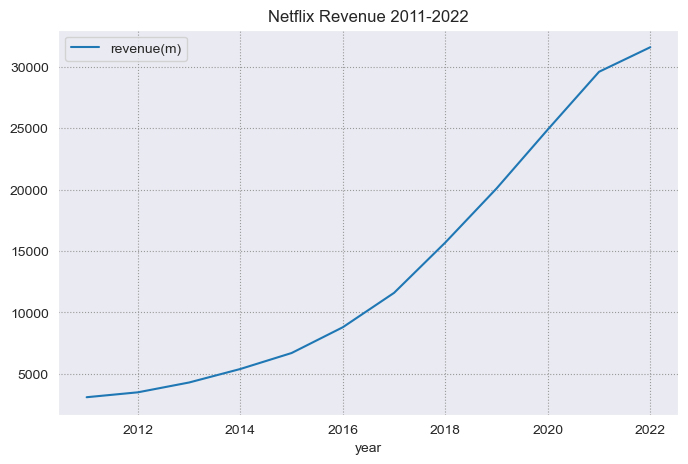

In [212]:
data.plot(x = 'year', y = 'revenue(m)', figsize = (8,5),
          title = 'Netflix Revenue 2011-2022');

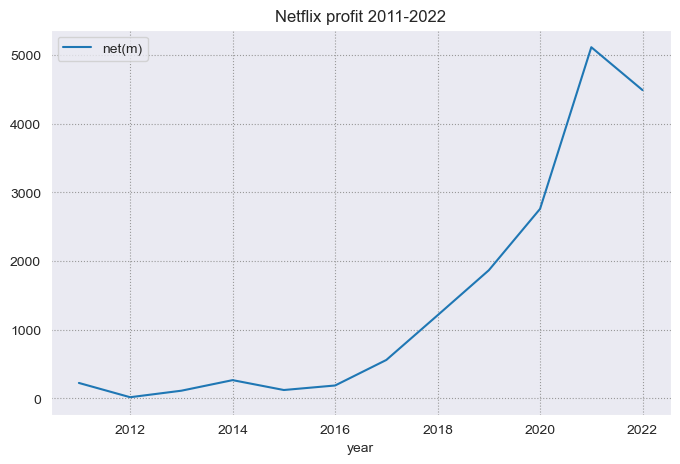

In [207]:
data.plot(x = 'year', y = 'net(m)', title = 'Netflix profit 2011-2022',
          figsize = (8,5));

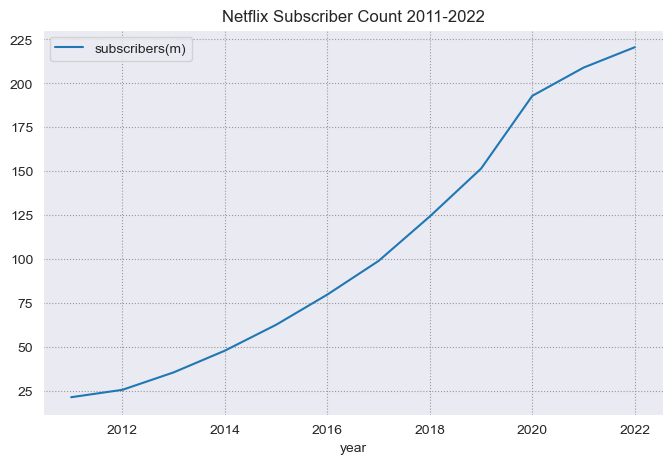

In [213]:
data.plot(x = 'year', y = 'subscribers(m)',
          title = 'Netflix Subscriber Count 2011-2022', figsize = (8,5));

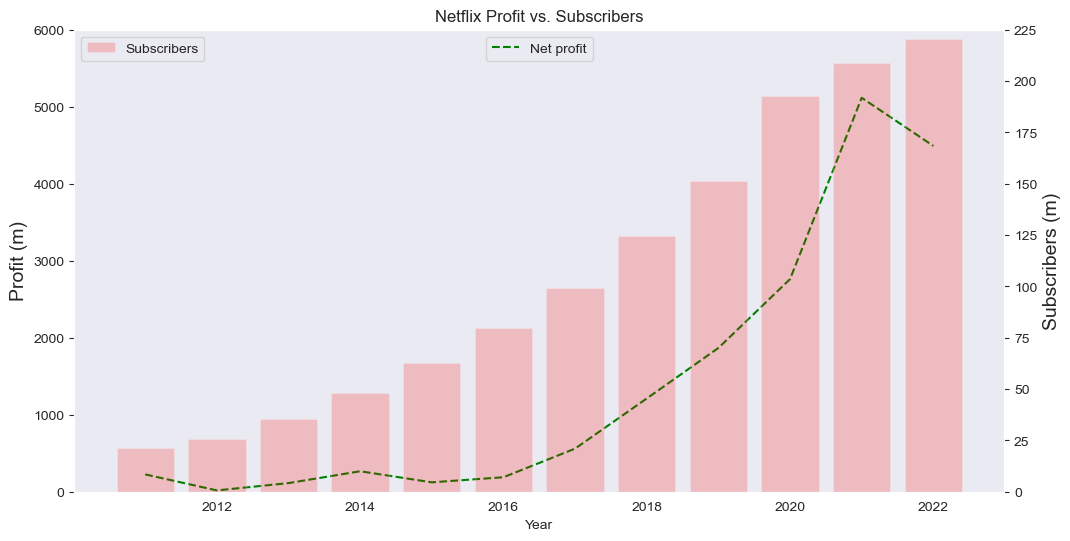

In [223]:
fig, ax1 = plt.subplots(figsize = (12,6))

ax1.set_title('Netflix Profit vs. Subscribers')
ax1.set_xlabel('Year')

p1, = ax1.plot('year', 'net(m)', data = data, color = 'green', linestyle = '--', linewidth = 1.5)
ax1.set_ylabel('Profit (m)')
ax1.grid(False)
ax1.set_ylim(0,6000)
ax1.legend(['Net profit'], loc = 'upper center')
ax1.yaxis.label.set_fontsize(14)

ax2 = ax1.twinx()
_ = ax2.bar('year', 'subscribers(m)', data = data, color = 'red', alpha = .2)
ax2.set_ylabel('Subscribers (m)')
ax2.grid(False)
ax2.set_ylim(0,225)
ax2.legend(['Subscribers'], loc = 'upper left')
ax2.yaxis.label.set_fontsize(14)

In [ ]:
fig, ax1 = plt.subplots(figsize = (12,6))

ax1.set_title('Subscribers vs. Inflation')
ax1.set_xlabel('Year')

p1, = ax1.plot('year', 'net(m)', data = data, color = 'green', linestyle = '--', linewidth = 1.5)
ax1.set_ylabel('Profit (m)')
ax1.grid(False)
ax1.set_ylim(0,6000)
ax1.legend(['Net profit'], loc = 'upper center')
ax1.yaxis.label.set_fontsize(14)

ax2 = ax1.twinx()
_ = ax2.bar('year', 'subscribers(m)', data = data, color = 'red', alpha = .2)
ax2.set_ylabel('Subscribers (m)')
ax2.grid(False)
ax2.set_ylim(0,225)
ax2.legend(['Subscribers'], loc = 'upper left')
ax2.yaxis.label.set_fontsize(14)

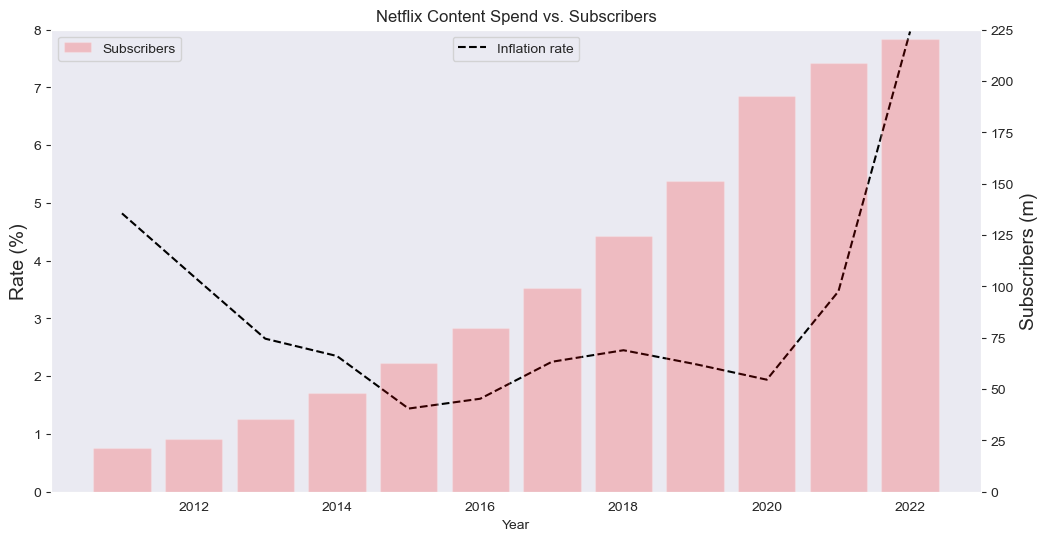

In [228]:
fig, ax1 = plt.subplots(figsize = (12,6))

ax1.set_title('Netflix Content Spend vs. Subscribers')
ax1.set_xlabel('Year')

p1, = ax1.plot('year', 'inf_ann', data = data2, color = 'black', linestyle = '--')
ax1.set_ylabel('Rate (%)')
ax1.grid(False)
ax1.set_ylim(0,8)
ax1.legend(['Inflation rate'], loc = 'upper center')
ax1.yaxis.label.set_fontsize(14)

ax2 = ax1.twinx()
_ = ax2.bar('year', 'subscribers(m)', data = data2, color = 'red', alpha = .2)
ax2.set_ylabel('Subscribers (m)')
ax2.grid(False)
ax2.set_ylim(0,225)
ax2.legend(['Subscribers'], loc = 'upper left')
ax2.yaxis.label.set_fontsize(14)

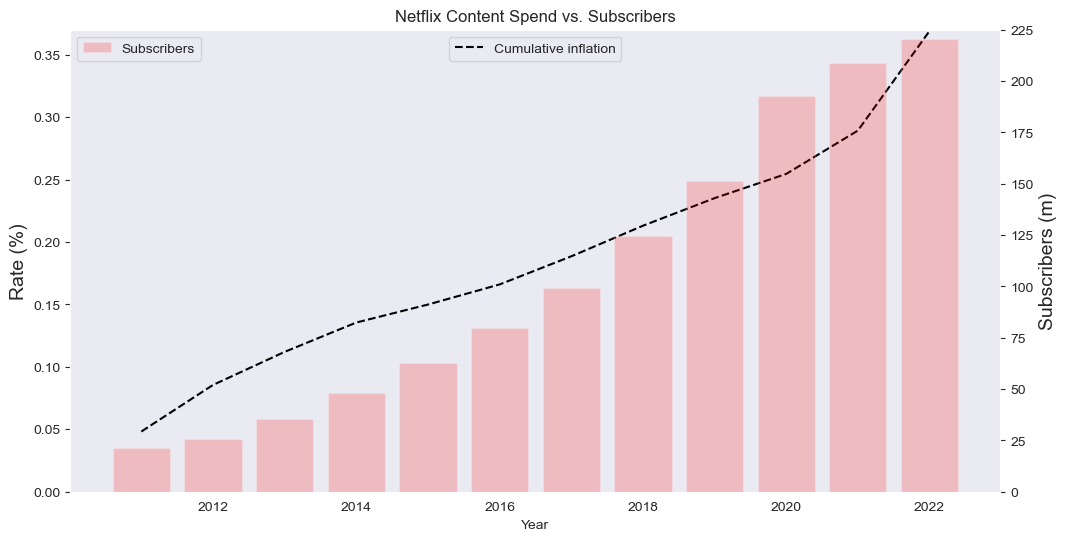

In [229]:
fig, ax1 = plt.subplots(figsize = (12,6))

ax1.set_title('Netflix Content Spend vs. Subscribers')
ax1.set_xlabel('Year')

p1, = ax1.plot('year', 'inf_cum', data = data2, color = 'black', linestyle = '--')
ax1.set_ylabel('Rate (%)')
ax1.grid(False)
ax1.set_ylim(0,0.37)
ax1.legend(['Cumulative inflation'], loc = 'upper center')
ax1.yaxis.label.set_fontsize(14)

ax2 = ax1.twinx()
_ = ax2.bar('year', 'subscribers(m)', data = data2, color = 'red', alpha = .2)
ax2.set_ylabel('Subscribers (m)')
ax2.grid(False)
ax2.set_ylim(0,225)
ax2.legend(['Subscribers'], loc = 'upper left')
ax2.yaxis.label.set_fontsize(14)

In [165]:
cont_spend = pd.read_excel(xls, 'Netflix annual content spend ($')
cont_spend.columns = ['year', 'cont_spend(b)']

In [76]:
cont_spend['cont_spend(m)'] = cont_spend['cont_spend(b)'] * 1000
# cont_spend.drop(['cont_spend(b)'], axis = 1, inplace = True)

data2 = pd.concat([data, cont_spend['cont_spend(m)']], axis = 1, join = 'outer')
data2

,year,revenue(b),net(m),subscribers(m),revenue(m),loss(m),cont_spend(m)
0,2011.0,3.1,225.0,21.50,3100.0,2875.0,3100.0
1,2012.0,3.5,17.0,25.71,3500.0,3483.0,3500.0
2,2013.0,4.3,112.0,35.63,4300.0,4188.0,4300.0
3,2014.0,5.4,266.0,47.99,5400.0,5134.0,5400.0
4,2015.0,6.7,122.0,62.71,6700.0,6578.0,6700.0
5,2016.0,8.8,188.0,79.90,8800.0,8612.0,6880.0
6,2017.0,11.6,560.0,99.04,11600.0,11040.0,8910.0
7,2018.0,15.7,1211.0,124.35,15700.0,14489.0,12000.0
8,2019.0,20.1,1867.0,151.56,20100.0,18233.0,13900.0
9,2020.0,24.9,2761.0,192.95,24900.0,22139.0,11800.0


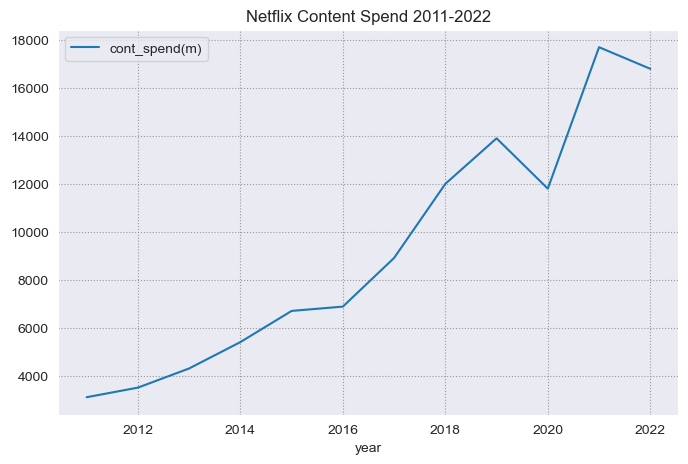

In [215]:
data2.plot(x = 'year', y = 'cont_spend(m)',
          title = 'Netflix Content Spend 2011-2022', figsize = (8,5));

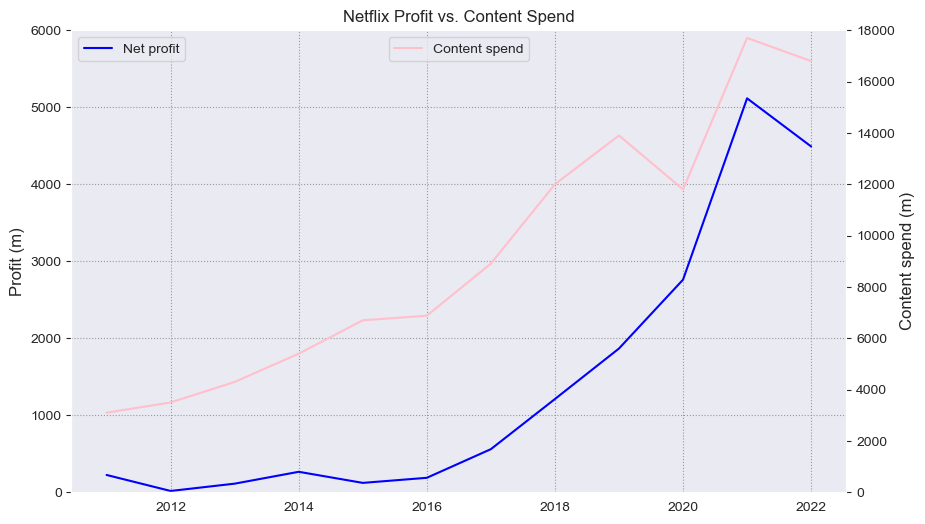

In [216]:
fig, ax1 = plt.subplots(figsize = (10,6))

ax1.set_title('Netflix Profit vs. Content Spend')

p1, = ax1.plot('year', 'net(m)', data = data2, color = 'blue')
ax1.set_ylabel('Profit (m)')
ax1.set_ylim(0,6000)
ax1.legend(['Net profit'], loc = 'upper left')
ax1.yaxis.label.set_fontsize(12)

ax2 = ax1.twinx()
p2, = ax2.plot('year', 'cont_spend(m)', data = data2, color = 'pink')
ax2.set_ylabel('Content spend (m)')
ax2.grid(False)
ax2.set_ylim(0,18000)
ax2.legend(['Content spend'], loc = 'upper center')
ax2.yaxis.label.set_fontsize(12)

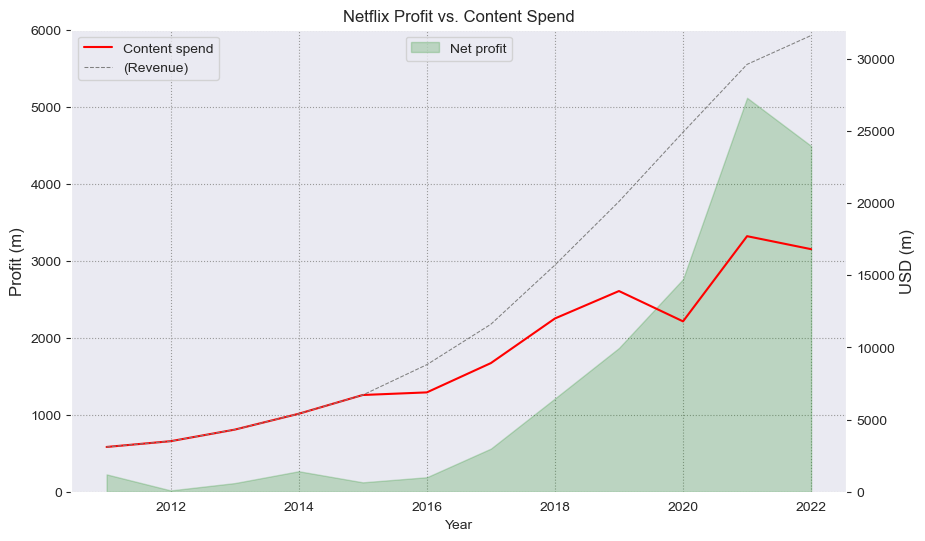

In [179]:
fig, ax1 = plt.subplots(figsize = (10,6))

ax1.set_title('Netflix Profit vs. Content Spend')
ax1.set_xlabel('Year')

p1, = ax1.stackplot('year', 'net(m)', data = data2, color = 'green', alpha = .2)
ax1.set_ylabel('Profit (m)')
ax1.set_ylim(0,6000)
ax1.legend(['Net profit'], loc = 'upper center')
ax1.yaxis.label.set_fontsize(12)

ax2 = ax1.twinx()
p2, = ax2.plot('year', 'cont_spend(m)', data = data2, color = 'red', linewidth = 1.5)
p2, = ax2.plot('year', 'revenue(m)', data = data2,
               color = 'grey', linestyle = '--', linewidth = .75)
ax2.set_ylabel('USD (m)')
ax2.grid(False)
ax2.set_ylim(0,32000)
ax2.legend(['Content spend', '(Revenue)'], loc = 'upper left')
ax2.yaxis.label.set_fontsize(12)

In [73]:
totals = dict(data2[['revenue(m)', 'cont_spend(m)', 'loss(m)', 'net(m)']].sum())

for k, v in totals.items():
    v2 = round(v/1000, 1)
    totals[k] = v2
    print("Between 2011 and 2022, Netflix had a total", k, 'of: $', v2, 'billion USD')

Between 2011 and 2022, Netflix had a total revenue(m) of: $ 165.3 billion USD
Between 2011 and 2022, Netflix had a total cont_spend(m) of: $ 111.0 billion USD
Between 2011 and 2022, Netflix had a total loss(m) of: $ 148.4 billion USD
Between 2011 and 2022, Netflix had a total net(m) of: $ 16.9 billion USD


In [78]:
data2['other_spend(m)'] = data2['revenue(m)'] - data2['cont_spend(m)'] - data2['net(m)']
data2['total_spend(m)'] = data2['other_spend(m)'] + data2['cont_spend(m)']
data2

,year,revenue(b),net(m),subscribers(m),revenue(m),loss(m),cont_spend(m),other_spend(m),total_spend(m)
0,2011.0,3.1,225.0,21.50,3100.0,2875.0,3100.0,-225.0,2875.0
1,2012.0,3.5,17.0,25.71,3500.0,3483.0,3500.0,-17.0,3483.0
2,2013.0,4.3,112.0,35.63,4300.0,4188.0,4300.0,-112.0,4188.0
3,2014.0,5.4,266.0,47.99,5400.0,5134.0,5400.0,-266.0,5134.0
4,2015.0,6.7,122.0,62.71,6700.0,6578.0,6700.0,-122.0,6578.0
5,2016.0,8.8,188.0,79.90,8800.0,8612.0,6880.0,1732.0,8612.0
6,2017.0,11.6,560.0,99.04,11600.0,11040.0,8910.0,2130.0,11040.0
7,2018.0,15.7,1211.0,124.35,15700.0,14489.0,12000.0,2489.0,14489.0
8,2019.0,20.1,1867.0,151.56,20100.0,18233.0,13900.0,4333.0,18233.0
9,2020.0,24.9,2761.0,192.95,24900.0,22139.0,11800.0,10339.0,22139.0


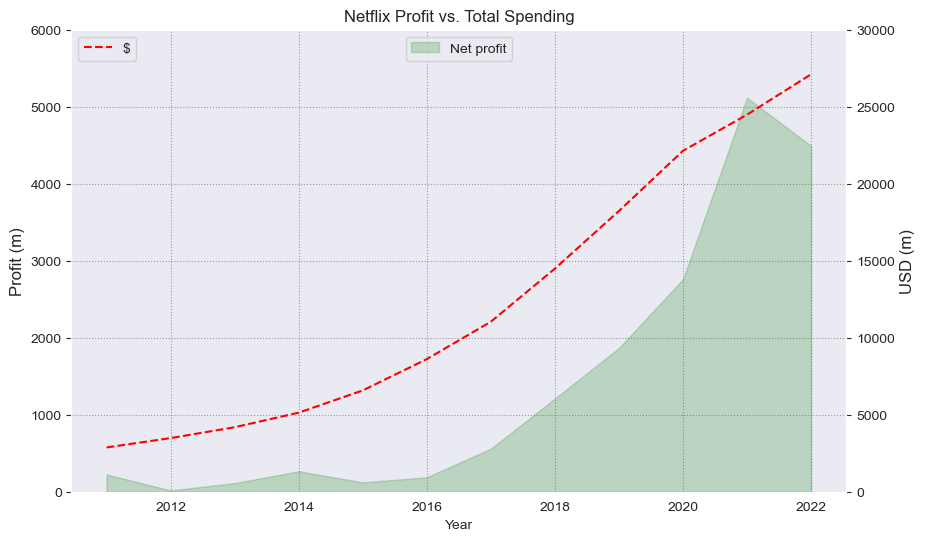

In [187]:
fig, ax1 = plt.subplots(figsize = (10,6))

ax1.set_title('Netflix Profit vs. Total Spending')
ax1.set_xlabel('Year')

p1, = ax1.stackplot('year', 'net(m)', data = data2, color = 'green', alpha = .2)
ax1.set_ylabel('Profit (m)')
ax1.set_ylim(0,6000)
ax1.legend(['Net profit'], loc = 'upper center')
ax1.yaxis.label.set_fontsize(12)

ax2 = ax1.twinx()
p2, = ax2.plot('year', 'total_spend(m)', data = data2, color = 'red', linestyle = '--')
ax2.set_ylabel('USD (m)')
ax2.grid(False)
ax2.set_ylim(0,30000)
ax2.legend('$', loc = 'upper left')
ax2.yaxis.label.set_fontsize(12)

Overall spending starts to increase sharply in 2016 and net profits follow suit in 2017.

In [92]:
inflation_rates = [4.82, 3.73, 2.65, 2.35, 1.44, 1.61, 2.25, 2.45, 2.21, 1.94, 3.47, 7.97]
data2['inf_ann'] = inflation_rates

In [191]:
cumulative = [4.82]

for i in range(1, len(inflation_rates)):
    try:
        inf_cum = inflation_rates[i] + cumulative[i-1]
        cumulative.append(inf_cum)
    except: pass

In [192]:
inf_cum_ls = [round(i, 2) for i in cumulative]
inf_cum_ls

[4.82, 8.55, 11.2, 13.55, 14.99, 16.6, 18.85, 21.3, 23.51, 25.45, 28.92, 36.89]

In [193]:
data2['inf_cum'] = [r/100 for r in inf_cum_ls]

In [194]:
data2['profit_adj'] = data2['net(m)'] * data2['inf_cum']
data2['total_spend_adj'] =  data2['total_spend(m)'] * data2['inf_cum']

In [196]:
data3 = data2.drop(['revenue(b)', 'loss(m)', 'subscribers(m)'], axis = 1)

,year,net(m),revenue(m),cont_spend(m),other_spend(m),total_spend(m),inf_ann,inf_cum,profit_adj,total_spend_adj
0,2011.0,225.0,3100.0,3100.0,-225.0,2875.0,4.82,0.0482,10.8450,138.5750
1,2012.0,17.0,3500.0,3500.0,-17.0,3483.0,3.73,0.0855,1.4535,297.7965
2,2013.0,112.0,4300.0,4300.0,-112.0,4188.0,2.65,0.1120,12.5440,469.0560
3,2014.0,266.0,5400.0,5400.0,-266.0,5134.0,2.35,0.1355,36.0430,695.6570
4,2015.0,122.0,6700.0,6700.0,-122.0,6578.0,1.44,0.1499,18.2878,986.0422
5,2016.0,188.0,8800.0,6880.0,1732.0,8612.0,1.61,0.1660,31.2080,1429.5920
6,2017.0,560.0,11600.0,8910.0,2130.0,11040.0,2.25,0.1885,105.5600,2081.0400
7,2018.0,1211.0,15700.0,12000.0,2489.0,14489.0,2.45,0.2130,257.9430,3086.1570
8,2019.0,1867.0,20100.0,13900.0,4333.0,18233.0,2.21,0.2351,438.9317,4286.5783
9,2020.0,2761.0,24900.0,11800.0,10339.0,22139.0,1.94,0.2545,702.6745,5634.3755


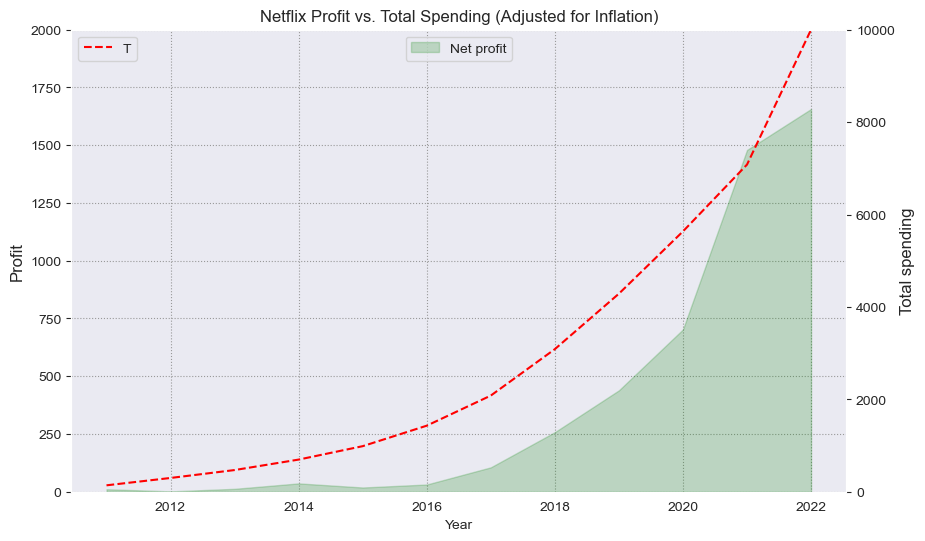

In [200]:
fig, ax1 = plt.subplots(figsize = (10,6))

ax1.set_title('Netflix Profit vs. Total Spending (Adjusted for Inflation)')
ax1.set_xlabel('Year')

p1, = ax1.stackplot('year', 'profit_adj', data = data2, color = 'green', alpha = .2)
ax1.set_ylabel('Profit')
ax1.set_ylim(0,2000)
ax1.legend(['Net profit'], loc = 'upper center')
ax1.yaxis.label.set_fontsize(12)

ax2 = ax1.twinx()
p2, = ax2.plot('year', 'total_spend_adj', data = data2, color = 'red', linestyle = '--')
ax2.set_ylabel('Total spending')
ax2.grid(False)
ax2.set_ylim(0,10000)
ax2.legend('Total spending', loc = 'upper left')
ax2.yaxis.label.set_fontsize(12)